In [179]:
#The objective to perform the analysis is to find out if the income of the person is above 50k or not. Its a classification problem.

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import math
import joblib
from math import sqrt
import scipy
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [268]:
#Lets read the csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [269]:
# lets create a dataframe
Income=pd.DataFrame(data=df)
Income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [270]:
Income.Workclass.unique()


array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [271]:
Income.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [272]:
Income.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [273]:
#lets find the shape of the dataset
Income.shape
#It has 32560 rows and 15 columns

(32560, 15)

In [274]:
Income.dtypes
#the attributes have integer and object type data

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [275]:
Income.describe()
#since there is difference between mean and median, skewness is present
#Outliers may be present
#the spread of data is the most in Fnlwgt

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [276]:
#lets search for missing values
Income.isnull().sum()
#there seems to be no missing values, however some of the attributes have a question mark which needs to be replaced

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [277]:
Income.replace(" ?",np.NaN,inplace=True)

In [278]:
Income["Workclass"]=Income.Workclass.fillna(Income["Workclass"].mode()[0])

In [279]:
Income["Occupation"]=Income.Workclass.fillna(Income["Occupation"].mode()[0])

In [280]:
Income["Native_country"]=Income.Workclass.fillna(Income["Native_country"].mode()[0])

In [281]:
Income["Income"].value_counts()
#We can use F1 scoring to check for the accuracy as there seems to be an imbalance

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [282]:
le1=LabelEncoder()
Income["Workclass"]=le1.fit_transform(Income["Workclass"])
print(Income["Workclass"])
print(Income["Workclass"].value_counts())

0        5
1        3
2        3
3        3
4        3
        ..
32555    3
32556    3
32557    3
32558    3
32559    4
Name: Workclass, Length: 32560, dtype: int32
3    24532
5     2541
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: Workclass, dtype: int64


In [283]:
le2=LabelEncoder()
Income["Education"]=le2.fit_transform(Income["Education"])
print(Income["Education"])
print(Income["Education"].value_counts())

0         9
1        11
2         1
3         9
4        12
         ..
32555     7
32556    11
32557    11
32558    11
32559    11
Name: Education, Length: 32560, dtype: int32
11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64


In [284]:
le3=LabelEncoder()
Income["Marital_status"]=le3.fit_transform(Income["Marital_status"])
print(Income["Marital_status"])
print(Income["Marital_status"].value_counts())

0        2
1        0
2        2
3        2
4        2
        ..
32555    2
32556    2
32557    6
32558    4
32559    2
Name: Marital_status, Length: 32560, dtype: int32
2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64


In [285]:
le4=LabelEncoder()
Income["Occupation"]=le4.fit_transform(Income["Occupation"])
print(Income["Occupation"])
print(Income["Occupation"].value_counts())

0        5
1        3
2        3
3        3
4        3
        ..
32555    3
32556    3
32557    3
32558    3
32559    4
Name: Occupation, Length: 32560, dtype: int32
3    24532
5     2541
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: Occupation, dtype: int64


In [286]:
le5=LabelEncoder()
Income["Relationship"]=le5.fit_transform(Income["Relationship"])
print(Income["Relationship"])
print(Income["Relationship"].value_counts())

0        0
1        1
2        0
3        5
4        5
        ..
32555    5
32556    0
32557    4
32558    3
32559    5
Name: Relationship, Length: 32560, dtype: int32
0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64


In [287]:
le6=LabelEncoder()
Income["Race"]=le6.fit_transform(Income["Race"])
print(Income["Race"])
print(Income["Race"].value_counts())

0        4
1        4
2        2
3        2
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    4
Name: Race, Length: 32560, dtype: int32
4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64


In [288]:
le7=LabelEncoder()
Income["Sex"]=le7.fit_transform(Income["Sex"])
print(Income["Sex"])
print(Income["Sex"].value_counts())

0        1
1        1
2        1
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    1
32559    0
Name: Sex, Length: 32560, dtype: int32
1    21789
0    10771
Name: Sex, dtype: int64


In [289]:
le8=LabelEncoder()
Income["Native_country"]=le8.fit_transform(Income["Native_country"])
print(Income["Native_country"])
print(Income["Native_country"].value_counts())

0        5
1        3
2        3
3        3
4        3
        ..
32555    3
32556    3
32557    3
32558    3
32559    4
Name: Native_country, Length: 32560, dtype: int32
3    24532
5     2541
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: Native_country, dtype: int64


In [290]:
le9=LabelEncoder()
Income["Income"]=le9.fit_transform(Income["Income"])
print(Income["Income"])
print(Income["Income"].value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32
0    24719
1     7841
Name: Income, dtype: int64


In [291]:
#lets perform analysis

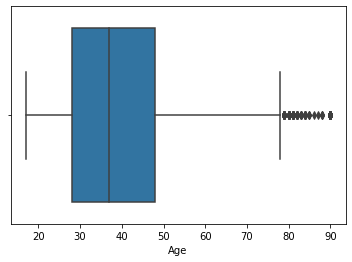

In [292]:
Age1=sns.boxplot(Income["Age"])
# There are some outliers present.
# the minimum value is 17. Median value is 37. Maximum value is 90

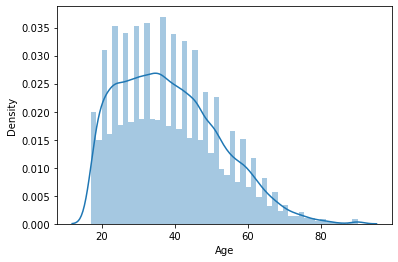

In [293]:
Age2=sns.distplot(Income["Age"])
#Density of values lie between 20 to 50
#Right skewness is present

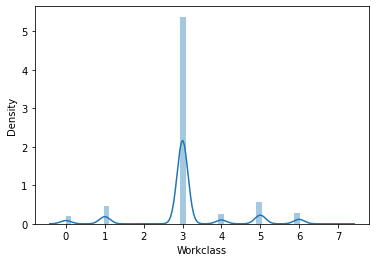

In [294]:
Workclass=sns.distplot(Income["Workclass"])
#Maximum density is at 3

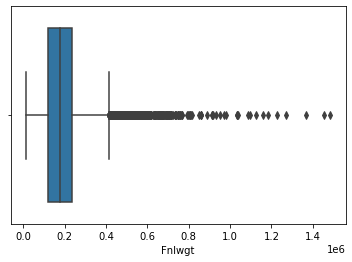

In [295]:
Fnlwgt1=sns.boxplot(Income["Fnlwgt"])
# There are outliers present.

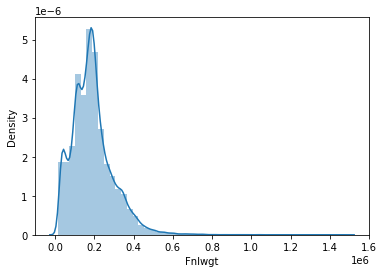

In [296]:
Fnlwgt2=sns.distplot(Income["Fnlwgt"])
#Density increases between 0.01 to 0.2
#Skewness is maximum to the right

In [297]:
Income["Education"].value_counts()
#HS-grad has the highest count while preschool has the least count

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

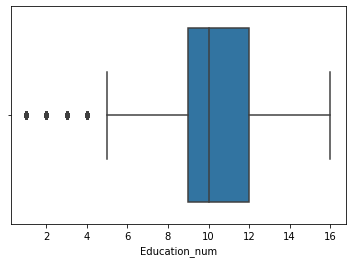

In [298]:
Education_num1=sns.boxplot(Income["Education_num"])
#There are a few outliers present

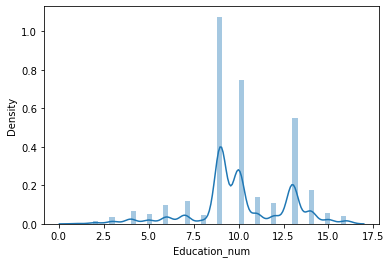

In [299]:
Education_num2=sns.distplot(Income["Education_num"])
#There is skewness present

In [300]:
Income["Marital_status"].value_counts()
#the least values are for Married-AF-spouse and the most values are for married-civ-spouse

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

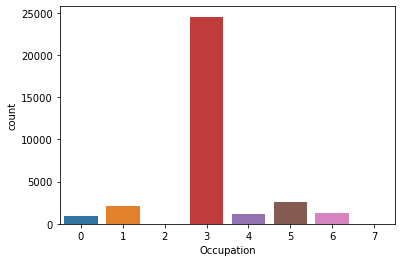

In [301]:
sns.countplot(Income["Occupation"])
#count of the 3rd occupation is the most

In [302]:
Income["Relationship"].value_counts()
#The values are most for husbands and least for other relative

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

In [303]:
Income["Race"].value_counts()
#WHites are the most is race while others races are the least

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

In [304]:
Income["Sex"].value_counts()
#Males are the most in numbers

1    21789
0    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Native_country', ylabel='count'>

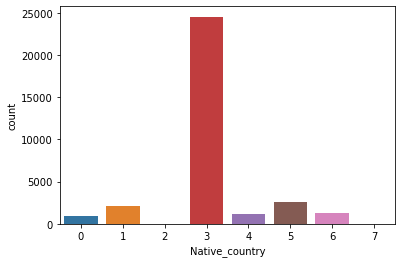

In [305]:
sns.countplot(Income["Native_country"])
#count of 3rd native_country is the most

In [306]:
#lets remove the outliers using zscore 

In [307]:
zscore(Income)

array([[ 0.83709708,  1.72133587, -1.0087417 , ..., -2.22212013,
         1.72133587, -0.5632099 ],
       [-0.04264043, -0.08522344,  0.24504633, ..., -0.03542999,
        -0.08522344, -0.5632099 ],
       [ 1.05703146, -0.08522344,  0.42576955, ..., -0.03542999,
        -0.08522344, -0.5632099 ],
       ...,
       [ 1.42358875, -0.08522344, -0.3588108 , ..., -0.03542999,
        -0.08522344, -0.5632099 ],
       [-1.21562378, -0.08522344,  0.11092744, ..., -1.65520046,
        -0.08522344, -0.5632099 ],
       [ 0.98372   ,  0.81805622,  0.92986178, ..., -0.03542999,
         0.81805622,  1.77553698]])

In [308]:
z=np.abs(zscore(Income))
z

array([[0.83709708, 1.72133587, 1.0087417 , ..., 2.22212013, 1.72133587,
        0.5632099 ],
       [0.04264043, 0.08522344, 0.24504633, ..., 0.03542999, 0.08522344,
        0.5632099 ],
       [1.05703146, 0.08522344, 0.42576955, ..., 0.03542999, 0.08522344,
        0.5632099 ],
       ...,
       [1.42358875, 0.08522344, 0.3588108 , ..., 0.03542999, 0.08522344,
        0.5632099 ],
       [1.21562378, 0.08522344, 0.11092744, ..., 1.65520046, 0.08522344,
        0.5632099 ],
       [0.98372   , 0.81805622, 0.92986178, ..., 0.03542999, 0.81805622,
        1.77553698]])

In [309]:
print(np.where(z>3))

(array([    9,    10,    13, ..., 32532, 32550, 32552], dtype=int64), array([12,  8,  8, ...,  8,  8,  8], dtype=int64))


In [310]:
Income_New=Income[(z<3).all(axis=1)]

In [311]:
Income_New.shape

(28577, 15)

In [312]:
#we are getting aound 12%data loss so we will go with the original dataset without removal of the outliers

In [313]:
#lets check for the skewness before removing the skewness
Income.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.076178
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country     0.076178
Income             1.212383
dtype: float64

In [314]:
Income["Age"]=power_transform(Income["Age"].values.reshape(-1,1))

In [315]:
Income["Fnlwgt"]=power_transform(Income["Fnlwgt"].values.reshape(-1,1))

In [316]:
Income["Capital_gain"]=power_transform(Income["Capital_gain"].values.reshape(-1,1))

In [317]:
Income["Capital_loss"]=np.sqrt(Income["Capital_loss"].values.reshape(-1,1))

In [318]:
#lets check the skewness post removal of the skewness
Income.skew()

Age              -0.013897
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.076178
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.376279
Hours_per_week    0.227636
Native_country    0.076178
Income            1.212383
dtype: float64

In [319]:
#lets check for heatmap of the relationship between the target variables and the independent variables
Income1=Income.corr()
Income1["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Capital_gain      0.266271
Age               0.264064
Hours_per_week    0.229690
Sex               0.215995
Capital_loss      0.146170
Education         0.079311
Race              0.071853
Native_country    0.002739
Occupation        0.002739
Workclass         0.002739
Fnlwgt           -0.005229
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

In [320]:
#lets separate x and y before performing machine learning

In [324]:
x=Income.drop("Income",axis=1)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,5,-1.089889,9,13,2,5,0,4,1,-0.301370,0.0,13,5
1,0.102717,3,0.398743,11,9,0,3,1,4,1,-0.301370,0.0,40,3
2,1.064381,3,0.562540,1,7,2,3,0,2,1,-0.301370,0.0,40,3
3,-0.731663,3,1.340398,9,13,2,3,5,2,0,-0.301370,0.0,40,3
4,0.028023,3,0.957182,12,14,2,3,5,4,0,-0.301370,0.0,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,3,0.746749,7,12,2,3,5,4,0,-0.301370,0.0,38,3
32556,0.247374,3,-0.193298,11,9,2,3,0,4,1,-0.301370,0.0,40,3
32557,1.334556,3,-0.219755,11,9,6,3,4,4,0,-0.301370,0.0,40,3
32558,-1.358341,3,0.271668,11,9,4,3,3,4,1,-0.301370,0.0,20,3


In [326]:
y=Income["Income"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [328]:
#lets perform standard scaler on x

S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 0.89194656,  1.72133587, -1.08988899, ..., -0.21987204,
        -2.22212013,  1.72133587],
       [ 0.10271741, -0.08522344,  0.39874263, ..., -0.21987204,
        -0.03542999, -0.08522344],
       [ 1.06438077, -0.08522344,  0.56254016, ..., -0.21987204,
        -0.03542999, -0.08522344],
       ...,
       [ 1.33455599, -0.08522344, -0.2197547 , ..., -0.21987204,
        -0.03542999, -0.08522344],
       [-1.35834147, -0.08522344,  0.27166793, ..., -0.21987204,
        -1.65520046, -0.08522344],
       [ 1.00782289,  0.81805622,  0.98216482, ..., -0.21987204,
        -0.03542999,  0.81805622]])

In [330]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 14)
(9768, 14)
(22792,)
(9768,)


#Now lets use four ML algos to select the best fit model:
1)Logistic Regression
2)KNN
3)Randomforest
4)Adaboost

In [337]:
#1) Logisticregression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#lets predict y values
pred1=lg.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
score1=cross_val_score(lg,x,y,scoring="f1",cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.8142915642915642
[[6879  516]
 [1298 1075]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7395
           1       0.68      0.45      0.54      2373

    accuracy                           0.81      9768
   macro avg       0.76      0.69      0.71      9768
weighted avg       0.80      0.81      0.80      9768

[0.53064391 0.54344512 0.54496333 0.54421252 0.54663609]
0.5419801951849783
0.005765710700847848


In [341]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,x,y,scoring="f1",cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8147010647010647
[[6572  987]
 [ 823 1386]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7559
           1       0.58      0.63      0.60      2209

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.74      9768
weighted avg       0.82      0.81      0.82      9768

[0.60140327 0.60183968 0.61382909 0.62214876 0.62781457]
0.6134070764160718
0.010602516793911575


In [355]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,x,y,scoring="f1",cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8486895986895987
[[6822  905]
 [ 573 1468]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7727
           1       0.62      0.72      0.67      2041

    accuracy                           0.85      9768
   macro avg       0.77      0.80      0.78      9768
weighted avg       0.86      0.85      0.85      9768

[0.64681725 0.6436152  0.6624374  0.66918325 0.66644182]
0.6576989837802572
0.010464638751948816


In [340]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,x,y,scoring="f1",cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.8579033579033579
[[6976  969]
 [ 419 1404]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7945
           1       0.59      0.77      0.67      1823

    accuracy                           0.86      9768
   macro avg       0.77      0.82      0.79      9768
weighted avg       0.88      0.86      0.86      9768

[0.65107782 0.64919942 0.66690962 0.67129291 0.67556839]
0.6628096325166101
0.010718536331112496


In [342]:
#the best fit model is Random Forest.Lets use the hypertuning parameter

In [345]:
parameters={"n_estimators":[100,10,120,50],"criterion":["gini","entropy"],"min_samples_leaf":[1,0.1,10,20],"bootstrap":[True,False],"random_state":[42,50,30,100]}
rsearch=RandomizedSearchCV(rf,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 0.1, 10, 20],
                                        'n_estimators': [100, 10, 120, 50],
                                        'random_state': [42, 50, 30, 100]})

In [346]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

RandomForestClassifier(bootstrap=False, min_samples_leaf=10, random_state=30)
{'random_state': 30, 'n_estimators': 100, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': False}
0.8581956274908059


In [354]:
#lets put these best parameters back into the randomforest model

rf1=RandomForestClassifier(random_state=30,n_estimators=100,min_samples_leaf=10,criterion="gini",bootstrap=False)
rf1.fit(x_train,y_train)
#lets predict y values
pred5=rf1.predict(x_test)
print(accuracy_score(pred5,y_test))
print(confusion_matrix(pred5,y_test))
print(classification_report(pred5,y_test))

0.860053235053235
[[6957  929]
 [ 438 1444]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7886
           1       0.61      0.77      0.68      1882

    accuracy                           0.86      9768
   macro avg       0.77      0.82      0.79      9768
weighted avg       0.88      0.86      0.87      9768



In [348]:
y_pred_prob=rf1.predict_proba(x_test)[:,1]
y_pred_prob

array([0.03799337, 0.37924452, 0.64041898, ..., 0.29246327, 0.00076411,
       0.01309864])

In [349]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.97592968 0.98999324 1.        ]
[0.00000000e+00 4.21407501e-04 2.10703751e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.99747414e+00 9.97474142e-01 9.94833366e-01 ... 3.14465409e-05
 9.18273646e-06 0.00000000e+00]


Text(0.5, 1.0, 'Random Forest')

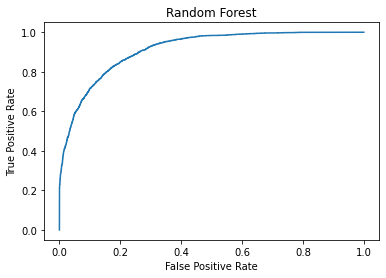

In [351]:
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")

In [353]:
#lets searlise and dump it for further use
joblib.dump(rf1,"rf1.obj")

['rf1.obj']